# Crop production in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read CROP Production Dataset.
hp = pd.read_csv(r'C:/Users/user/Downloads/crop production.csv')

In [3]:
hp.shape

(246091, 7)

In [4]:
hp.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
hp.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [6]:
#Summarizing hp dataset

In [7]:
hp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,242361.0,582503.442251,1.706581e+07,0.00,88.0,729.0,7023.0,1.250800e+09


In [8]:
hp.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
hp.dropna(inplace=True)

In [10]:
hp.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
hp_year = hp[['State_Name','Crop_Year','Season','Crop','Area','Production','District_Name']].groupby('State_Name').sum()
hp_year.head()

,Crop_Year,Area,Production
State_Name,,,
Andaman and Nicobar Islands,403014,337083.4,7.182232e+08
Andhra Pradesh,19180467,131507319.0,1.732459e+10
Arunachal Pradesh,5103954,4364340.0,6.823913e+06
Assam,29337168,70378752.0,2.111752e+09
Bihar,37843015,128269529.0,3.664836e+08


In [12]:
hp_year.shape

(33, 3)

In [13]:
# total no of state 44

In [14]:
# Creating summary table to understand the trend using year variable 
hp_year = hp[['State_Name','Crop_Year','Season','Crop','Area','Production','District_Name']].groupby('Crop_Year').sum()
hp_year.head()

,Area,Production
Crop_Year,,
1997,2.317150e+08,8.512329e+08
1998,1.666316e+08,5.825321e+09
1999,1.586125e+08,6.434666e+09
2000,1.652898e+08,7.449709e+09
2001,1.652927e+08,7.465541e+09


In [15]:
hp_year.shape

(19, 2)

In [16]:
hp_year.tail()

,Area,Production
Crop_Year,,
2011,1.536093e+08,1.430890e+10
2012,1.516983e+08,8.171055e+09
2013,1.415019e+08,1.290359e+10
2014,1.157431e+08,8.664541e+09
2015,4.600298e+06,6.935065e+06


In [17]:
hp_year.head()

,Area,Production
Crop_Year,,
1997,2.317150e+08,8.512329e+08
1998,1.666316e+08,5.825321e+09
1999,1.586125e+08,6.434666e+09
2000,1.652898e+08,7.449709e+09
2001,1.652927e+08,7.465541e+09


In [18]:
# toatal 19 years till 2015

In [19]:
hp_year.reset_index(inplace=True)

hp_year.head()

,Crop_Year,Area,Production
0,1997,2.317150e+08,8.512329e+08
1,1998,1.666316e+08,5.825321e+09
2,1999,1.586125e+08,6.434666e+09
3,2000,1.652898e+08,7.449709e+09
4,2001,1.652927e+08,7.465541e+09


Text(0, 0.5, 'Crop Production per Year')

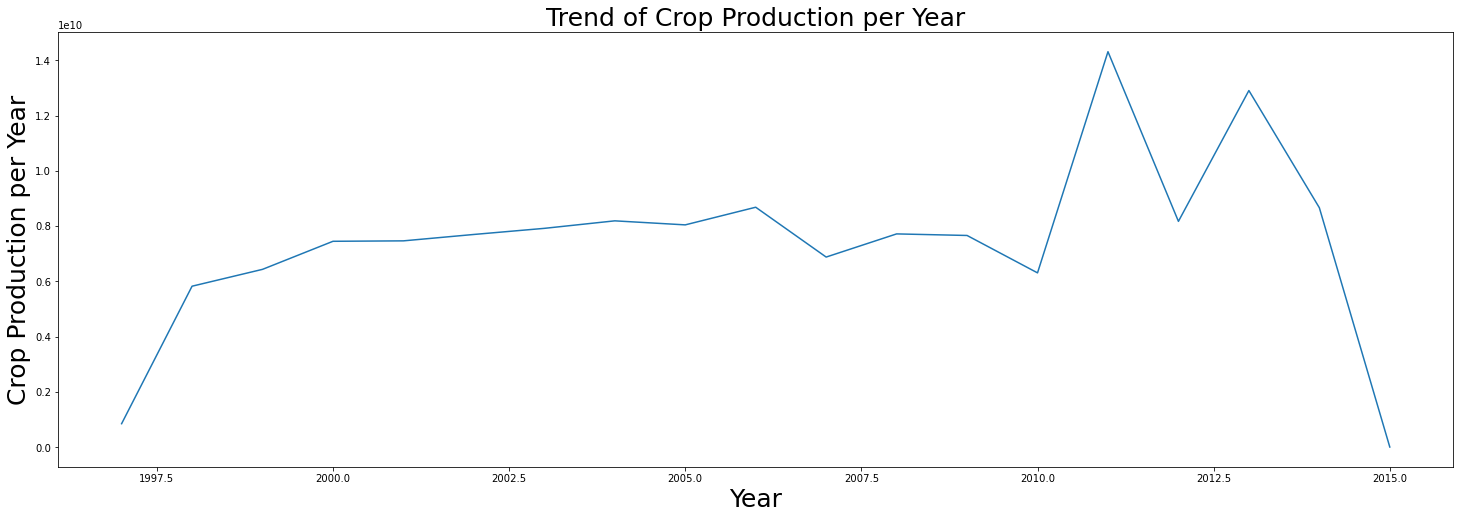

In [20]:
# Visualizing the trend of Production per year from year 1997 to 2015
plt.figure(figsize=(25,8))
plt.plot(hp_year['Crop_Year'],hp_year['Production'])
plt.title('Trend of Crop Production per Year' ,fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Crop Production per Year',fontsize = 25)

In [21]:
#The period between 2010-2012 and then 2012-2013 happens to be the year which saw highest yield for the crops.

Text(0, 0.5, 'Area per Year')

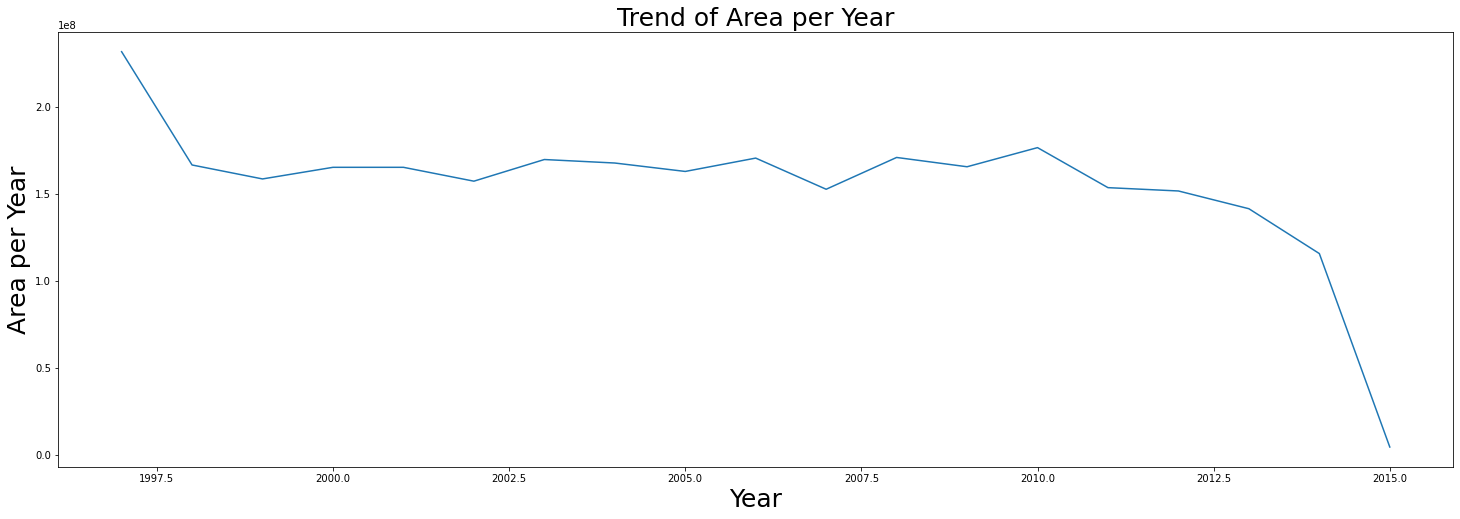

In [22]:
# Visualizing the trend of Area per year from year 1997 to 2015
plt.figure(figsize=(25,8))
plt.plot(hp_year['Crop_Year'],hp_year['Area'])
plt.title('Trend of Area per Year' ,fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Area per Year',fontsize = 25)

In [23]:
# The land under agricultue is decreasing from 2010.

In [24]:
# Group the dataset by states and using sum method to get the total crop production value descending order.
US_state = hp[['State_Name','Crop_Year','Season','Crop','Area','Production','District_Name']].groupby('State_Name').sum()
US_state.reset_index(level=0,inplace=True)
US_state.sort_values(by='Production',ascending=False,inplace=True)
US_state.head()

,State_Name,Crop_Year,Area,Production
15,Kerala,8028282,3.180225e+07,9.788005e+10
1,Andhra Pradesh,19180467,1.315073e+08,1.732459e+10
27,Tamil Nadu,26596201,9.541695e+07,1.207644e+10
30,Uttar Pradesh,66576513,4.336223e+08,3.234493e+09
3,Assam,29337168,7.037875e+07,2.111752e+09


In [25]:
#Let's see the top 5 states with most production over the years

(array([0.0e+00, 2.0e+10, 4.0e+10, 6.0e+10, 8.0e+10, 1.0e+11, 1.2e+11]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

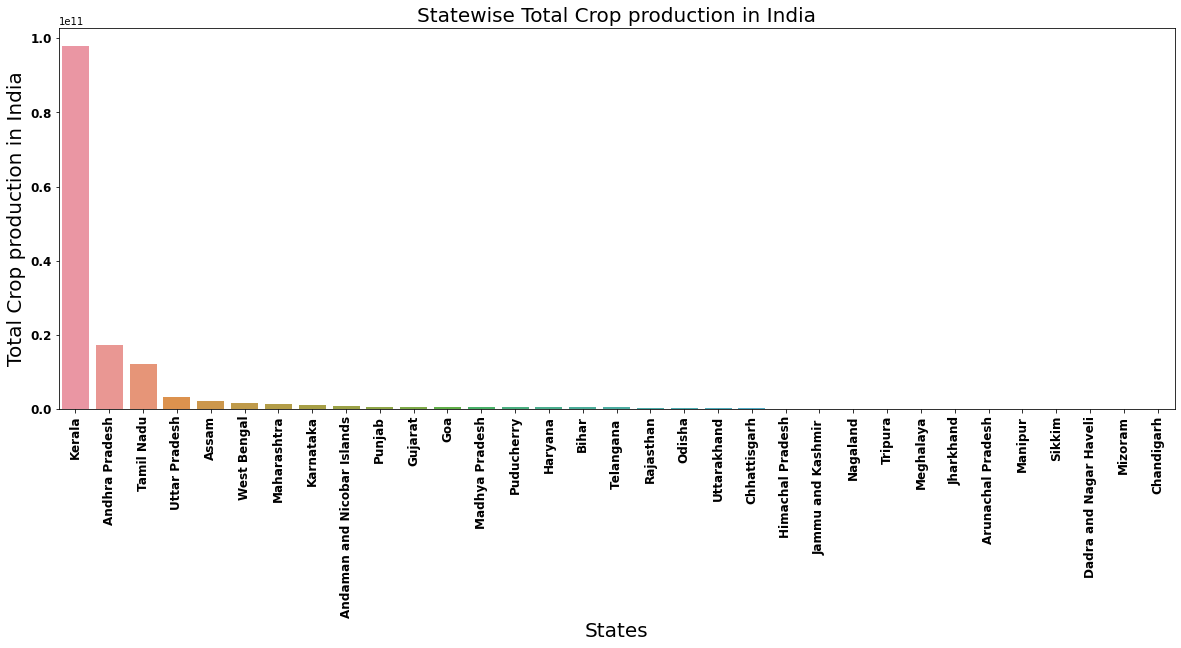

In [26]:
#Creating a Bar chart to visualize the total crop production by states.

plt.figure(figsize=(20,7))
sns.barplot(x=US_state['State_Name'],y = US_state['Production'])
plt.title('Statewise Total Crop production in India',fontsize =20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Total Crop production in India',fontsize=20)
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

In [27]:
# We can see that Kerela has the highest production, Also we can see that the top 3 states
#with highest production over the years arefrom South India

In [28]:
#So we can say that South India can be considered as the agricultural valley of India producing highest yiels

In [29]:
# Group the dataset by season and using sum method to get the total crop production value descending order.
season= hp[['State_Name','Crop_Year','Season','Crop','Area','Production','District_Name']].groupby('Season').sum()
season.reset_index(level=0,inplace=True)
season.sort_values(by='Production',ascending=False,inplace=True)
season.head()

,Season,Crop_Year,Area,Production
4,Whole Year,112522475,2.546494e+08,1.344248e+11
1,Kharif,189086925,1.403367e+09,4.029970e+09
2,Rabi,132715825,9.479091e+08,2.051688e+09
5,Winter,12142673,2.195979e+08,4.345498e+08
3,Summer,29723744,7.531411e+07,1.706579e+08


Text(0, 0.5, 'Total Production of Honey in USA')

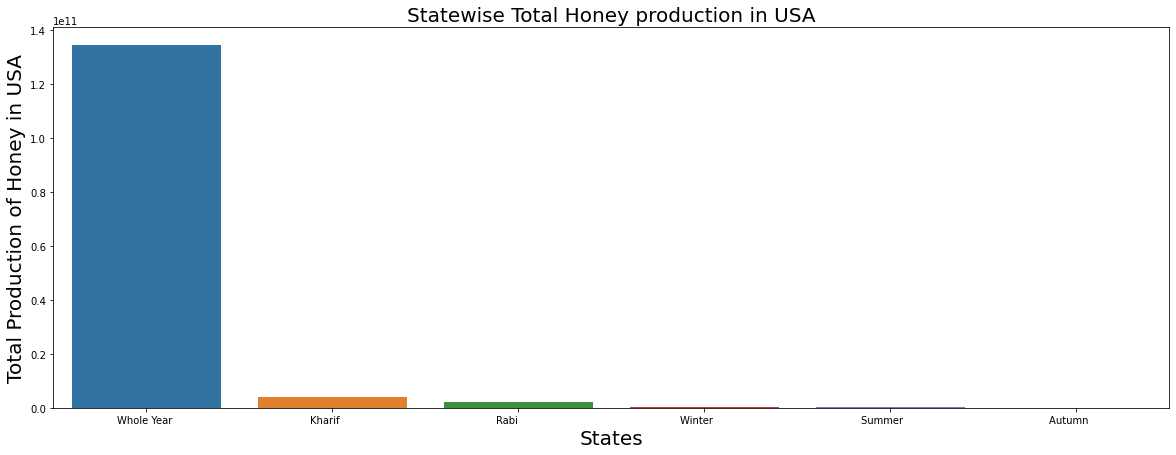

In [30]:
#Creating a Bar chart to visualize the total honey production by states.

plt.figure(figsize=(20,7))
sns.barplot(x=season['Season'],y = season['Production'])
plt.title('Statewise Total Honey production in USA',fontsize =20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Total Production of Honey in USA',fontsize=20)

In [31]:
#Whole Year season seems to have yeilded more crops compared to other seasons in a year

In [32]:
#Most of the crop production came from Kerala let's analyze Kerala's data

In [33]:
kerala_data = hp[hp['State_Name'] == 'Kerala']
kerala_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
97987,Kerala,ALAPPUZHA,1997,Whole Year,Arecanut,2253.0,1518.0
97988,Kerala,ALAPPUZHA,1997,Whole Year,Black pepper,2235.0,248.0
97989,Kerala,ALAPPUZHA,1997,Whole Year,Cashewnut,7205.0,2358.0
97990,Kerala,ALAPPUZHA,1997,Whole Year,Coconut,77893.0,399000.0
97991,Kerala,ALAPPUZHA,1997,Whole Year,Tapioca,3911.0,74110.0


In [34]:
kerala_district = kerala_data.groupby('District_Name').sum()['Production'].reset_index().sort_values(by='Production',ascending=False)
kerala_district

,District_Name,Production
7,KOZHIKODE,1.528074e+10
8,MALAPPURAM,1.451840e+10
11,THIRUVANANTHAPURAM,1.002271e+10
12,THRISSUR,9.923508e+09
3,KANNUR,9.783432e+09
4,KASARAGOD,7.732217e+09
5,KOLLAM,7.151945e+09
9,PALAKKAD,6.369382e+09
1,ERNAKULAM,5.021649e+09
0,ALAPPUZHA,4.800462e+09


In [35]:
top_prod_kerala = kerala_data.groupby('Crop').sum()["Production"].reset_index().sort_values(by='Production',ascending=False).nlargest(n=10,columns='Production')
top_prod_kerala

,Crop,Production
10,Coconut,9.780304e+10
37,Tapioca,4.611366e+07
29,Rice,1.059335e+07
2,Banana,7.655662e+06
35,Sugarcane,3.819916e+06
0,Arecanut,1.893642e+06
21,Mango,1.650151e+06
30,Rubber,1.175267e+06
5,Black pepper,9.715301e+05
8,Cashewnut,9.483952e+05


<AxesSubplot:xlabel='Production', ylabel='Crop'>

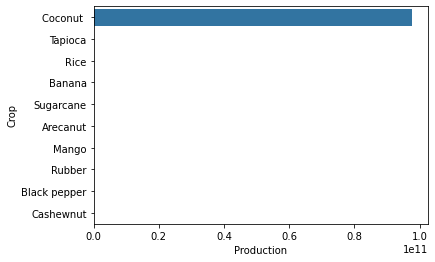

In [36]:
sns.barplot(data=top_prod_kerala,y='Crop',x='Production')

In [37]:
#Coconut is most produced crop in Kerala

<AxesSubplot:xlabel='Production', ylabel='District_Name'>

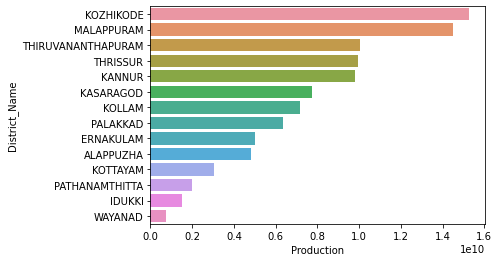

In [38]:
sns.barplot(data=kerala_district,y='District_Name',x='Production')

In [39]:
#Kozhikode and Malappuram Districts seem to have most favourable conditions crop production since they have more production.

In [40]:
hp.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year     1.344248e+11
Kharif         4.029970e+09
Rabi           2.051688e+09
Winter         4.345498e+08
Summer         1.706579e+08
Name: Production, dtype: float64

In [41]:
india_top_prod = hp.groupby('Crop').sum()['Production'].nlargest(20).reset_index() #Top 20 best performing crops
india_top_prod

,Crop,Production
0,Coconut,1.299816e+11
1,Sugarcane,5.535682e+09
2,Rice,1.605470e+09
3,Wheat,1.332826e+09
4,Potato,4.248263e+08
5,Cotton(lint),2.970000e+08
6,Maize,2.733418e+08
7,Jute,1.815582e+08
8,Banana,1.461327e+08
9,Soyabean,1.418372e+08


<AxesSubplot:xlabel='Production', ylabel='Crop'>

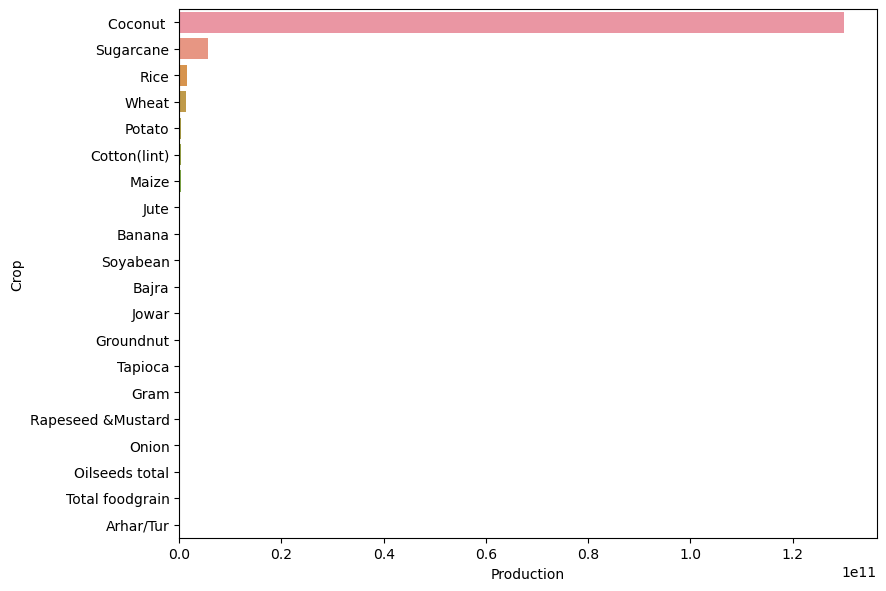

In [42]:
plt.figure(figsize=(9,7),dpi=100)
sns.barplot(data=india_top_prod,x='Production',y='Crop')

In [43]:
#Coconut, Sugarcane, Rice, Wheat and Potato happen to be the top 5 crops yeilding more productions in India over the years.

In [44]:
coconut_crop = hp[hp['Crop'] == 'Coconut ']

In [45]:
coconut_crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0
...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0


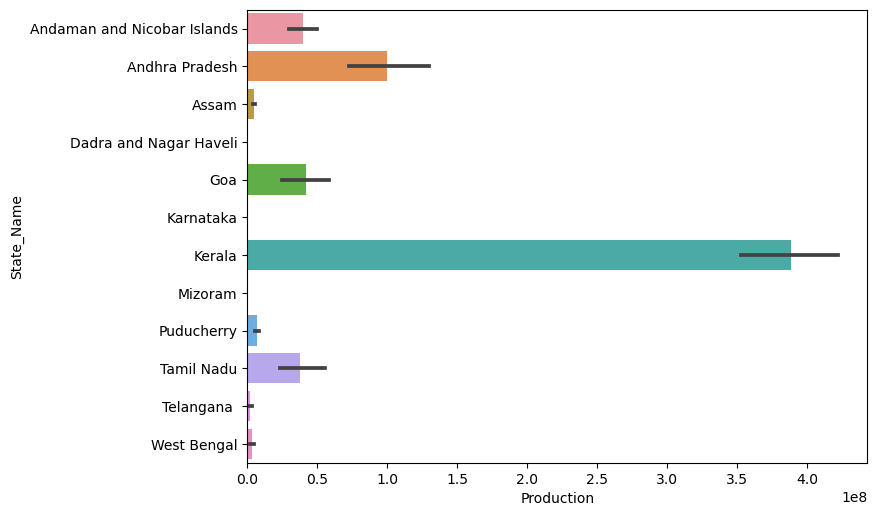

In [46]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=coconut_crop,x='Production',y='State_Name');

In [47]:
#Kerala has highest production of coconut

In [48]:
sugarcane_crop = hp[hp['Crop'] == 'Sugarcane']

In [49]:
sugarcane_crop.shape

(7827, 7)

In [50]:
sugarcane_crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75


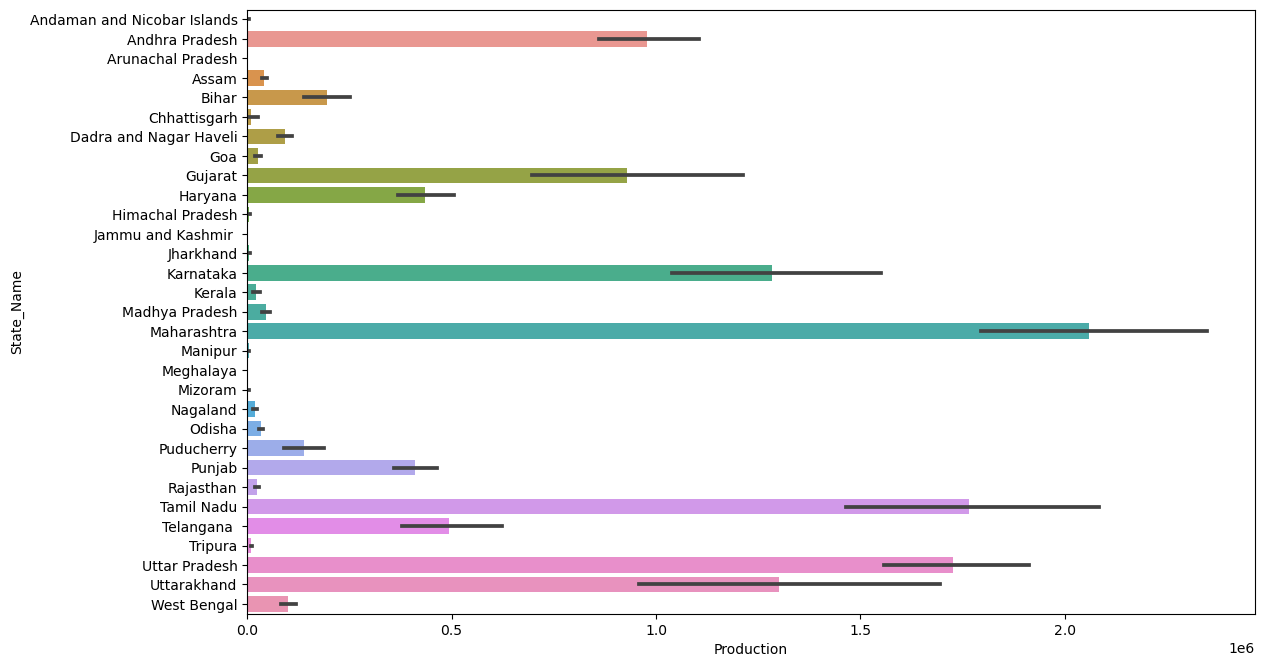

In [51]:
plt.figure(figsize=(13,8),dpi=100)
sns.barplot(data=sugarcane_crop,x='Production',y='State_Name');

In [52]:
#Maharashtra have the highest production of Sugarcane

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [74]:
hp['Season new'] = LabelEncoder().fit_transform(hp['Season'])
hp.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Season new
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,4


In [75]:
hp['Crop new'] = LabelEncoder().fit_transform(hp['Crop'])
hp.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Season new,Crop new
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1,2
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,1,74
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1,95
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4,7
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,4,22


In [76]:
hp['State Name new'] = LabelEncoder().fit_transform(hp['State_Name'])
hp.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Season new,Crop new,State Name new
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1,2,0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,1,74,0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1,95,0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4,7,0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,4,22,0


In [77]:
hp['District_Name new'] = LabelEncoder().fit_transform(hp['District_Name'])
hp.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Season new,Crop new,State Name new,District_Name new
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1,2,0,427
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,1,74,0,427
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1,95,0,427
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4,7,0,427
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,4,22,0,427


In [78]:
print(pd.isnull(hp).sum())

State_Name           0
District_Name        0
Crop_Year            0
Season               0
Crop                 0
Area                 0
Production           0
Season new           0
Crop new             0
State Name new       0
District_Name new    0
dtype: int64


In [79]:
#Linear_Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(hp.drop(['Production','District_Name','State_Name','Season','Crop'],axis=1), 
                                                    hp['Production'], test_size=0.11, 
                                                    random_state=15)

In [81]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

0.7074648489423407 %
